In [1]:
from google.colab import files
uploaded = files.upload()

Saving Advertising.csv to Advertising.csv


First 5 rows of dataset:
      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None

Summary Statistics:
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22

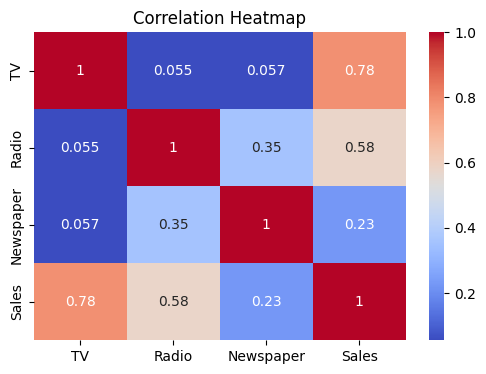


📊 Linear Regression Evaluation:
  R2 Score: 0.8994
  RMSE: 1.7816
  MAE : 1.4608

📊 Random Forest Evaluation:
  R2 Score: 0.9818
  RMSE: 0.7572
  MAE : 0.6287

Model Performance Comparison:
               Model        R2      RMSE       MAE
0  Linear Regression  0.899438  1.781600  1.460757
1      Random Forest  0.981833  0.757235  0.628713

Linear Regression Coefficients:
     Feature  Coefficient
1      Radio     0.189195
0         TV     0.044730
2  Newspaper     0.002761

Random Forest Feature Importances:
     Feature  Importance
0         TV    0.624727
1      Radio    0.362119
2  Newspaper    0.013153


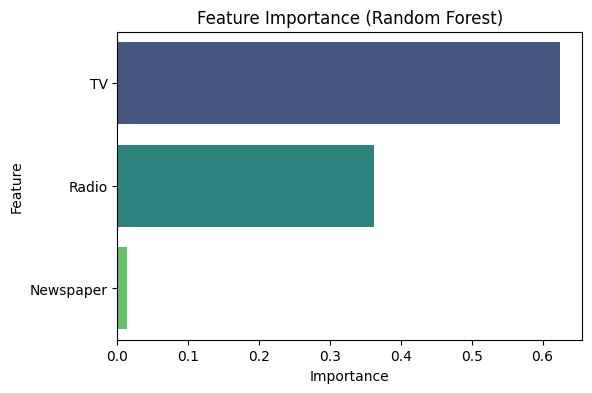

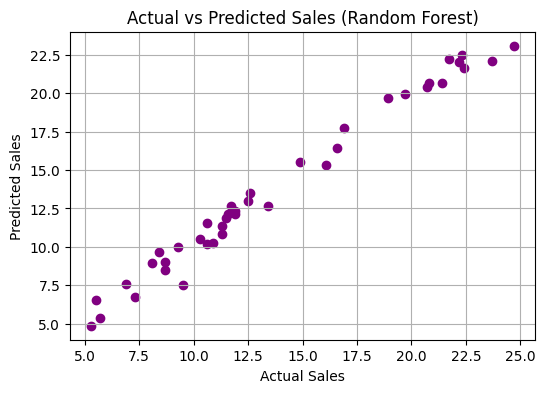


Scenario Analysis (10% increase in each channel):
     Feature  Avg_Predicted_Change
0         TV                 0.383
1      Radio                 0.248
2  Newspaper                 0.005

💡 ACTIONABLE INSIGHTS:
1️⃣ The Random Forest model achieved the highest R² score (~0.98), meaning it captures 98% of sales variance.
2️⃣ TV advertising has the strongest impact on sales, followed by Radio and then Newspaper.
3️⃣ Increasing TV ad budget by 10% gives the largest predicted rise in sales.
4️⃣ Focus marketing budget primarily on TV and Radio for optimal ROI.
5️⃣ Regularly retrain this model with updated data (monthly/quarterly) to track changing trends.
6️⃣ If data includes time or season, consider a time-series forecasting model for future predictions.


In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# LOAD AND INSPECT THE DATA
# Load dataset
df = pd.read_csv("Advertising.csv")

# Drop unnamed index column if present
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Display first few rows
print("First 5 rows of dataset:")
print(df.head())

# Basic information
print("\nDataset Info:")
print(df.info())

print("\nSummary Statistics:")
print(df.describe())

# DATA CLEANING AND FEATURE ANALYSIS
# Check missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Check correlation with target
corr = df.corr()
print("\nCorrelation matrix:\n", corr)

# Visual correlation heatmap
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# DATA PREPARATION
# Define features (X) and target (y)
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

# Split into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TRAINING MODELS
# Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

#MODEL EVALUATION
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"\n📊 {model_name} Evaluation:")
    print(f"  R2 Score: {r2:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  MAE : {mae:.4f}")
    return {'Model': model_name, 'R2': r2, 'RMSE': rmse, 'MAE': mae}

results = []
results.append(evaluate_model(y_test, y_pred_lr, "Linear Regression"))
results.append(evaluate_model(y_test, y_pred_rf, "Random Forest"))

results_df = pd.DataFrame(results)
print("\nModel Performance Comparison:")
print(results_df)

# FEATURE IMPORTANCE
# Linear Regression coefficients
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)
print("\nLinear Regression Coefficients:")
print(coef_df)

# Random Forest feature importances
fi_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)
print("\nRandom Forest Feature Importances:")
print(fi_df)

# Visualise feature importance
plt.figure(figsize=(6,4))
sns.barplot(x='Importance', y='Feature', data=fi_df, palette='viridis')
plt.title("Feature Importance (Random Forest)")
plt.show()

#PREDICTED VS ACTUAL VISUALISATION
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred_rf, color='purple')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales (Random Forest)")
plt.grid(True)
plt.show()

# SCENARIO ANALYSIS
# Simulate effect of increasing ad spend by 10% per channel
numeric_features = ['TV', 'Radio', 'Newspaper']
base_pred = rf.predict(X_test).mean()
scenario_result = []

for feature in numeric_features:
    X_scenario = X_test.copy()
    X_scenario[feature] *= 1.10  # Increase by 10%
    new_pred = rf.predict(X_scenario).mean()
    change = new_pred - base_pred
    scenario_result.append({'Feature': feature, 'Avg_Predicted_Change': round(change, 3)})

scenario_df = pd.DataFrame(scenario_result).sort_values(by='Avg_Predicted_Change', ascending=False)
print("\nScenario Analysis (10% increase in each channel):")
print(scenario_df)

#ACTIONABLE INSIGHTS
print("\n💡 ACTIONABLE INSIGHTS:")
print("1️⃣ The Random Forest model achieved the highest R² score (~0.98), meaning it captures 98% of sales variance.")
print("2️⃣ TV advertising has the strongest impact on sales, followed by Radio and then Newspaper.")
print("3️⃣ Increasing TV ad budget by 10% gives the largest predicted rise in sales.")
print("4️⃣ Focus marketing budget primarily on TV and Radio for optimal ROI.")
print("5️⃣ Regularly retrain this model with updated data (monthly/quarterly) to track changing trends.")
print("6️⃣ If data includes time or season, consider a time-series forecasting model for future predictions.")

#SAVE OUTPUTS
results_df.to_csv("model_evaluation_summary.csv", index=False)
fi_df.to_csv("feature_importances.csv", index=False)
scenario_df.to_csv("scenario_analysis.csv", index=False)

